In [1]:
%matplotlib notebook
from dataloader import *
from plotter import *
from scripts import *
from itertools import combinations

In [2]:
#load data
coordinates = load_features("../data/13P_T029_CENTERED.txt", 13)
potentials = load_labels("../data/13P_T029_POTENTIALS.txt", 1)

num_data = len(coordinates)
num_particles = len(coordinates[0])/3

<IPython.core.display.Javascript object>


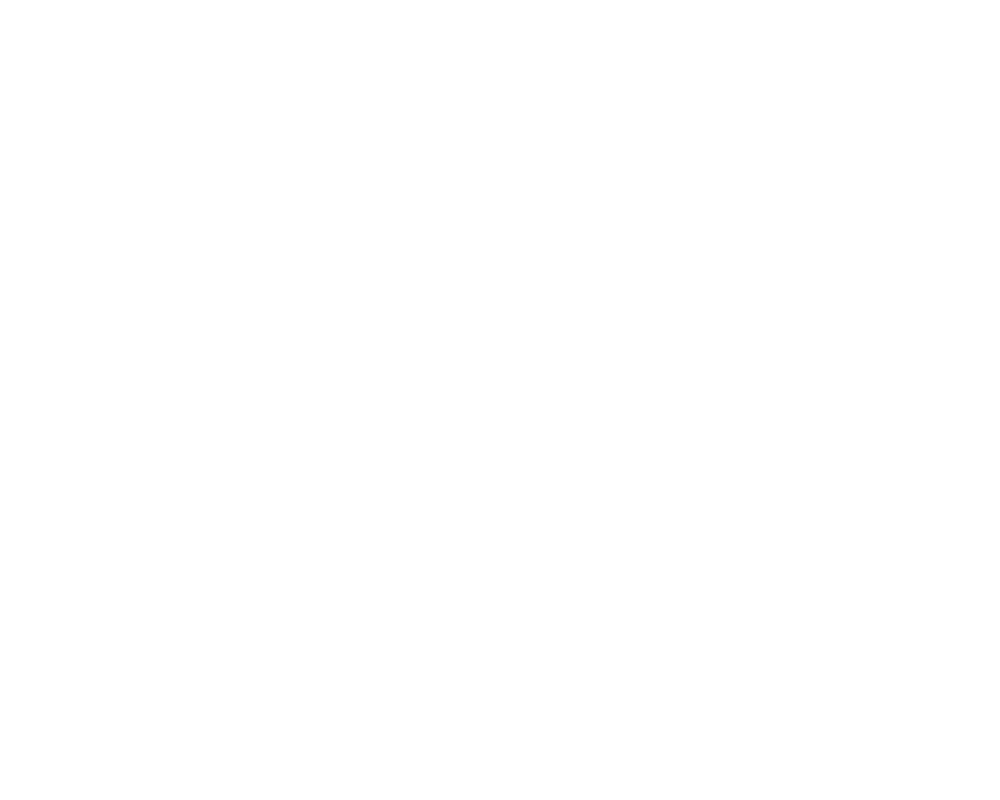

In [3]:
#Histogram of potential energy 
plot_histogram(potentials)

<IPython.core.display.Javascript object>


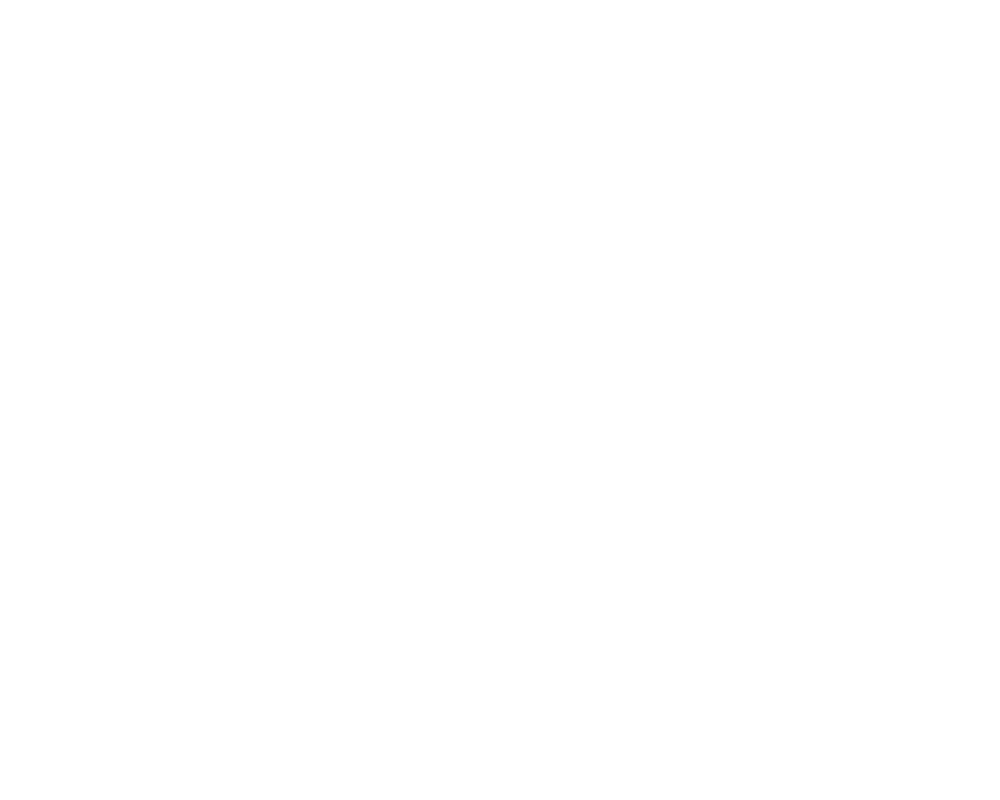

In [4]:
#plot feature space (all of the particle positions (colored by potential energy))
x = []
y = []
z = []
c = []
for i in range(len(coordinates)):
    for j in range(0, len(coordinates[i]), 3):
        x.append(coordinates[i][j])
        y.append(coordinates[i][j+1])
        z.append(coordinates[i][j+2])
        c.append(potentials[i])
plot_3d(x, y, z, color=np.reshape(c, len(c)))

In [8]:
#extract some information from the feature space 
side_length_space = [] #side lengths between each particles
perimeter = [] #side lengths between each particles
n_bonds = np.zeros(len(coordinates)) #number of bonds in the structure
cut_off_distance = 1.5 #sigma  
for i in range(len(coordinates)):
    side_length_space.append([])
    particles = np.reshape(coordinates[i], [num_particles, 3])
    perms = combinations(particles, 2) 
    for perm in perms:
        side_length_space[i].append(np.linalg.norm(perm[0] - perm[1]))   
    perimeter.append(np.sum(side_length_space[i]))
    for j in range(len(side_length_space[i])):
        if side_length_space[i][j] < cut_off_distance:
            n_bonds[i] += 1
            

<IPython.core.display.Javascript object>


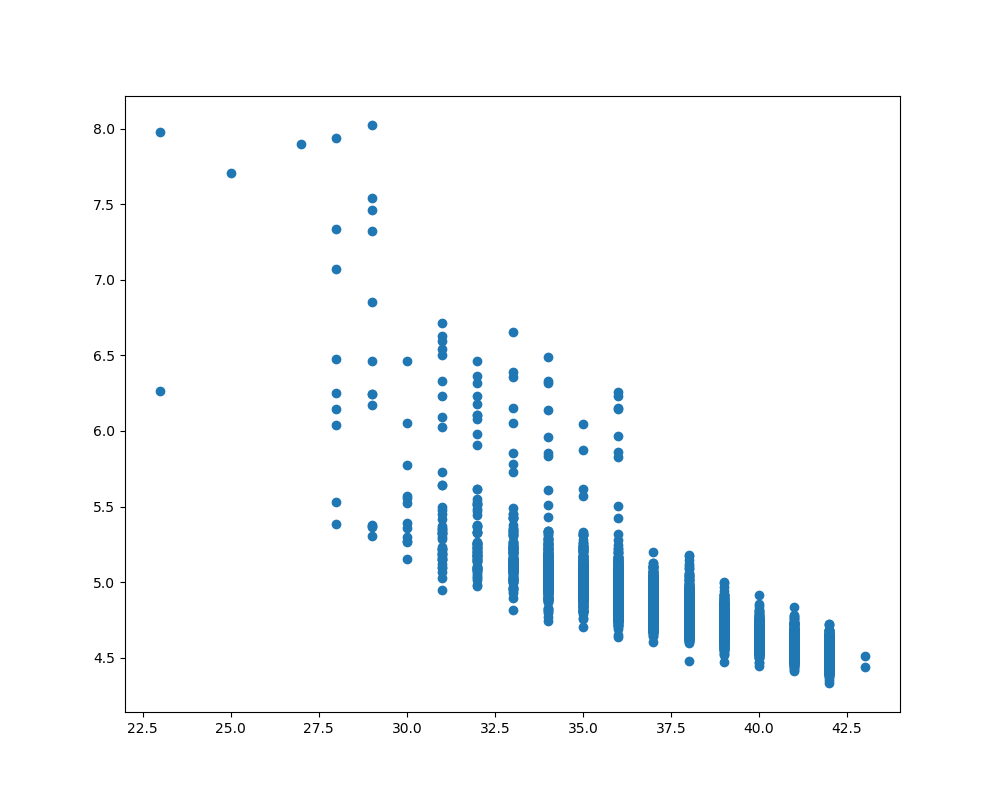

In [9]:
#calculate radius of gyration
RoG = np.zeros(len(coordinates))
for i in range(len(coordinates)):
    particles = np.reshape(coordinates[i], [num_particles, 3])
    for j in range(len(particles)):
        RoG[i] += np.linalg.norm(particles[j])/3.0
plot_2d(n_bonds, RoG)

In [ ]:
#this is a wierd dataset.... points with 0 bonds cannot have same RoG as with 3 bonds 
#Lets isolate the wierd particles
wierd_configs = []
wierd_configs_potentials = []
wierd_configs_positions = []
for i, rog in enumerate(RoG):
    if  n_bonds[i] == 0:
        wierd_configs.append(i)
for i in range(len(wierd_configs)):
    wierd_configs_positions.append(coordinates[wierd_configs[i]])
    wierd_configs_potentials.append(potentials[wierd_configs[i]])
print(len(wierd_configs_positions))

In [ ]:
x = []
y = []
z = []
c = []
for i in range(len(wierd_configs_positions)):
    iter = 0
    for j in range(0, len(wierd_configs_positions[i]), 3):
        x.append(wierd_configs_positions[i][j])
        y.append(wierd_configs_positions[i][j+1])
        z.append(wierd_configs_positions[i][j+2])
        c.append(wierd_configs_potentials[i])
plot_3d(x, y, z, color=np.reshape(c, len(c)))

In [ ]:
#lets check how the highest energy and lowest energy of the wierd configs look like 
lowest_energy = wierd_configs_potentials.index(np.min(wierd_configs_potentials))
highest_energy = wierd_configs_potentials.index(np.max(wierd_configs_potentials))

In [ ]:
print(n_bonds[wierd_configs[lowest_energy]])
print(n_bonds[wierd_configs[highest_energy]])

In [ ]:
print(wierd_configs_positions[lowest_energy])
print(wierd_configs_positions[highest_energy])

In [ ]:
print(wierd_configs_potentials[lowest_energy])
print(wierd_configs_potentials[highest_energy])

In [ ]:
#Radius of gyrations
print(RoG[wierd_configs[lowest_energy]])
print(RoG[wierd_configs[highest_energy]])

In [ ]:
#side_length spaces
print(side_length_space[wierd_configs[lowest_energy]])
print(side_length_space[wierd_configs[highest_energy]])